In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_data = os.path.join('c:\\', 'openclassrooms', 'projet 8','house-prices-advanced-regression-techniques')
data_fname = 'data_train.csv'
data_train = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
data_fname = 'data_test.csv'
data_test = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
data_fname = 'X_dummy_train.csv'
X_dummy_train = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
X_dummy_train=X_dummy_train.to_numpy()
data_fname = 'X_dummy_test.csv'
X_dummy_test = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
X_dummy_test=X_dummy_test.to_numpy()

In [3]:
data_test

,SalePrice,LotFrontage,LotArea,MasVnrArea,GarageArea,WoodDeckSF,PoolArea,TotalPorchSF,TotalSF,Age,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1460,NaN,4.394449,9.360741,0.000000,6.594413,4.948760,0.0,4.795791,7.483807,50,...,5,5,2,3,2,1,8,4,8,4
1461,NaN,4.406719,9.565775,4.691348,5.746203,5.976351,0.0,3.610918,7.885705,53,...,5,5,2,3,4,0,8,4,8,4
1462,NaN,4.317488,9.534668,0.000000,6.180017,5.361292,0.0,3.555348,7.846981,14,...,5,5,2,3,2,1,5,4,8,4
1463,NaN,4.369448,9.208238,3.044522,6.154858,5.888878,0.0,3.610918,7.836370,13,...,5,5,2,3,4,1,8,4,8,4
1464,NaN,3.784190,8.518392,0.000000,6.228511,0.000000,0.0,5.424950,7.848153,19,...,5,5,2,3,4,1,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,3.091042,7.568896,0.000000,0.000000,0.000000,0.0,0.000000,7.401842,37,...,3,3,2,3,4,1,8,0,8,4
2915,NaN,3.091042,7.546974,0.000000,5.659482,0.000000,0.0,3.218876,7.401842,37,...,5,5,2,3,4,1,6,0,8,0
2916,NaN,5.081404,9.903538,0.000000,6.357842,6.163315,0.0,0.000000,7.803435,47,...,5,5,2,3,4,1,11,0,8,0
2917,NaN,4.143135,9.253591,0.000000,0.000000,4.394449,0.0,3.496508,7.540622,15,...,3,3,2,3,2,3,9,0,8,4


In [4]:
y_train=data_train[data_train.columns[0]].values

print(data_train.columns)

X_train = data_train[data_train.columns[1:21]].values
X_test = data_test[data_test.columns[1:21]].values

data_train[['BedroomAbvGr','low_qual_share','TotRmsAbvGrd_withoutbedroomskitchen','MSSubClass']]

Index(['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'GarageArea',
       'WoodDeckSF', 'PoolArea', 'TotalPorchSF', 'TotalSF', 'Age',
       'AgeRemodAdd', 'TotalHomeQuality', 'GarageCars', 'Fireplaces',
       'TotalBathrooms', 'KitchenAbvGr', 'BedroomAbvGr', 'low_qual_share',
       'Bsmt_Unf_share', 'TotRmsAbvGrd_withoutbedroomskitchen', 'MSSubClass',
       'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='obje

,BedroomAbvGr,low_qual_share,TotRmsAbvGrd_withoutbedroomskitchen,MSSubClass
0,3,0.0,4,10
1,3,0.0,2,4
2,3,0.0,2,10
3,3,0.0,3,9
4,4,0.0,4,10
...,...,...,...,...
1455,3,0.0,3,10
1456,3,0.0,3,4
1457,4,0.0,4,9
1458,2,0.0,2,4


Concatenate numerical variables with dummy variables

In [5]:
X_train =np.concatenate((X_train,X_dummy_train),axis=1)
X_test =np.concatenate((X_test,X_dummy_test),axis=1)

Using Neighborhood for the stratification of the train_test_split seems good option

In [6]:
strata = data_train['Neighborhood'].values

from sklearn import model_selection

X_train_train, X_train_validation, y_train_train, y_train_validation = model_selection.train_test_split(X_train, y_train, test_size=0.25,stratify=strata, random_state=42 ) 

Reduce and center the data

In [7]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train_train[:,0:13])
X_train_train_std = std_scale.transform(X_train_train[:,0:13])
X_train_validation_std = std_scale.transform(X_train_validation[:,0:13])
X_test_std = std_scale.transform(X_test[:,0:13])

X_train_train_std=np.concatenate((X_train_train_std,X_train_train[:,13:]),axis=1)
X_train_validation_std=np.concatenate((X_train_validation_std,X_train_validation[:,13:]),axis=1)
X_test_std=np.concatenate((X_test_std,X_test[:,13:]),axis=1)

Creation of Fold

In [8]:

from sklearn import model_selection
# define model evaluation method
cv = model_selection.RepeatedKFold(n_splits=5,random_state=42 )

adaboost 

neg RMSE d'une regression ridge avec cv (apprentissage): -0.1675
RMSE d'une regression ridge avec cv (généralisation): 0.1808


Text(0.5, 0, 'Truths')

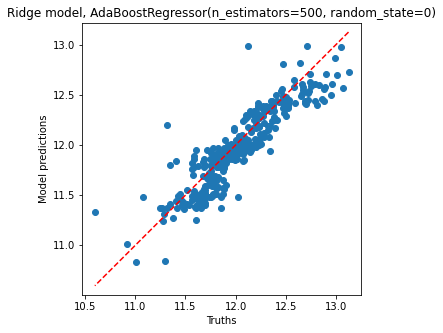

In [9]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
n_alphas = 200
n_estimators = [50,100,200,300,400,500]
score = 'neg_root_mean_squared_error'
param_grid={ 'n_estimators': n_estimators }
adaboost = AdaBoostRegressor(random_state=0)
grid_pred = model_selection.GridSearchCV(
        adaboost,
        param_grid,
        cv=cv,
        scoring=score)
grid_pred.fit(X_train_train_std, y_train_train)
print('''neg RMSE d'une regression ridge avec cv (apprentissage): {:.4f}'''.format(grid_pred.best_score_))
y_train_validation_pred_cv = grid_pred.predict(X_train_validation_std)
rmse_cv = np.sqrt(metrics.mean_squared_error(y_train_validation, y_train_validation_pred_cv))
print('''RMSE d'une regression ridge avec cv (généralisation): {:.4f}'''.format(rmse_cv))

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_train_validation, y_train_validation_pred_cv)
p1 = max(max(y_train_validation_pred_cv), max(y_train_validation))
p2 = min(min(y_train_validation_pred_cv), min(y_train_validation))
plt.plot([p1, p2], [p1, p2], '--',c='red')
ax.axes.axis('equal')
plt.title('Ridge model, {}'.format(grid_pred.best_estimator_))
plt.ylabel('Model predictions')
plt.xlabel('Truths')

In [10]:
r2_cv = metrics.r2_score(y_train_validation, y_train_validation_pred_cv)

In [11]:
print('''r² d'un adaboost avec cv (généralisation): {:.4f}'''.format(r2_cv))

r² d'un adaboost avec cv (généralisation): 0.7864


In [12]:
n_estimators=grid_pred.best_params_['n_estimators']

In [13]:
adaboost = AdaBoostRegressor(random_state=0)
adaboost.set_params(n_estimators=n_estimators)
adaboost.fit(X_train_train_std, y_train_train)

AdaBoostRegressor(n_estimators=500, random_state=0)

In [14]:
print(adaboost.feature_importances_[0:19])

[3.89159746e-02 1.67999946e-02 1.35049184e-04 2.17696956e-02
 7.36632667e-03 0.00000000e+00 1.94342801e-04 4.58032432e-01
 2.25614626e-02 2.08403700e-02 1.94373715e-01 2.16244181e-02
 2.33051066e-02 4.25097979e-02 4.32806577e-04 3.64272034e-03
 0.00000000e+00 4.58318298e-03 1.58254590e-02]


In [15]:
print(data_train.columns[1:20])

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'GarageArea', 'WoodDeckSF',
       'PoolArea', 'TotalPorchSF', 'TotalSF', 'Age', 'AgeRemodAdd',
       'TotalHomeQuality', 'GarageCars', 'Fireplaces', 'TotalBathrooms',
       'KitchenAbvGr', 'BedroomAbvGr', 'low_qual_share', 'Bsmt_Unf_share',
       'TotRmsAbvGrd_withoutbedroomskitchen'],
      dtype='object')


In [16]:
adaboost_features_importance=pd.DataFrame(adaboost.feature_importances_[0:19],index=data_train.columns[1:20], columns=["param"])

In [17]:
adaboost_features_importance

,param
LotFrontage,0.038916
LotArea,0.016800
MasVnrArea,0.000135
GarageArea,0.021770
WoodDeckSF,0.007366
PoolArea,0.000000
TotalPorchSF,0.000194
TotalSF,0.458032
Age,0.022561
AgeRemodAdd,0.020840


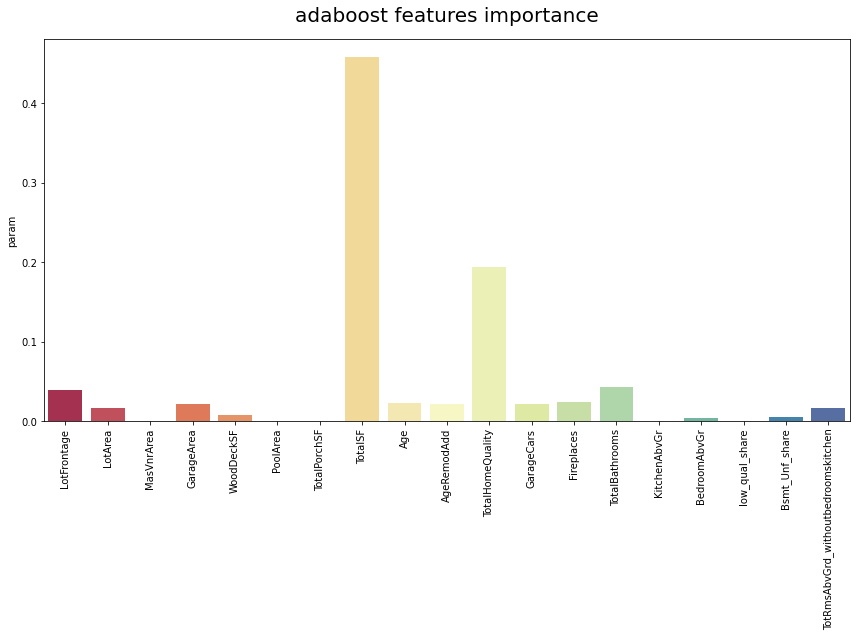

In [18]:
fig,axes=plt.subplots(1,1,figsize=(12,9))
sns.barplot(y=adaboost_features_importance['param'],x=adaboost_features_importance.index,palette='Spectral')
plt.title('adaboost features importance',size=20,color='black',y=1.03)
plt.xticks(rotation=90)
for p in axes.patches:
            value = p.get_height()
            if value <=.5:
                continue
            x = p.get_x() + p.get_width()-.9
            y = p.get_y() + p.get_height()+(.02*value)
            axes.text(x, y, str(value)[1:5], ha="left",fontsize=12,color='#000000')
plt.tight_layout();

In [19]:
adaboost_features_importance.to_csv(os.path.join(path_to_data,'adaboost_features_importance_prediction.csv'),index = True, header=True)

In [20]:
y_test = grid_pred.predict(X_test_std)

In [21]:
print(y_test)

[11.48806676 11.9346801  11.95146587 ... 11.98066601 11.76581069
 12.24295316]


In [22]:
data_y_predict=pd.DataFrame(y_test,index=data_test.index,columns=["SalePrice"])

In [23]:
data_y_predict

,SalePrice
1460,11.488067
1461,11.934680
1462,11.951466
1463,12.010697
1464,12.012732
...,...
2914,11.464459
2915,11.422026
2916,11.980666
2917,11.765811


In [24]:
data_y_predict['SalePrice']=np.expm1(data_y_predict['SalePrice'])

In [25]:
data_y_predict['id']=data_y_predict.index

In [26]:
data_y_predict['id']=data_y_predict['id']+1

In [27]:
data_y_predict=data_y_predict[['id','SalePrice']]

In [28]:
data_y_predict

,id,SalePrice
1460,1461,97543.772739
1461,1462,152462.438857
1462,1463,155043.254148
1463,1464,164504.107613
1464,1465,164839.301339
...,...,...
2914,2915,95267.975529
2915,2916,91309.983501
2916,2917,159637.316131
2917,2918,128772.547116


In [29]:
data_y_predict.to_csv(os.path.join(path_to_data,'adaboost_prediction.csv'),index = False, header=True)